In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading in data

In [23]:
df_train=pd.read_excel('recruiting_zeta-disease_training-data_take-home-challenge (5).xlsx')
df_pred=pd.read_excel('recruiting_zeta-disease_prediction-data_take-home-challenge.xlsx')

In [24]:
df_train

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90,78,0.5578,42,3,0
796,37,165,33.7,60,0,0.3078,69,6,1
797,27,166,25.6,74,0,0.2638,0,5,0
798,109,139,28.1,66,94,0.2298,53,1,0


# EDA and data cleaning

In [25]:
df_train.info()
## No null values, this is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [26]:
df_train.corr()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.000000,0.157705,0.035347,0.193066,-0.034294,0.042416,-0.106039,0.372373,0.192925
weight,0.157705,1.000000,0.214262,0.122349,0.304295,0.146779,0.053629,0.100834,0.471155
bmi,0.035347,0.214262,1.000000,0.240513,0.217265,0.116649,0.264861,0.028683,0.271856
blood_pressure,0.193066,0.122349,0.240513,1.000000,0.079425,0.045764,0.193221,0.095613,0.045739
insulin_test,-0.034294,0.304295,0.217265,0.079425,1.000000,0.175230,0.417894,-0.006292,0.126504
liver_stress_test,0.042416,0.146779,0.116649,0.045764,0.175230,1.000000,0.172048,0.021817,0.184738
cardio_stress_test,-0.106039,0.053629,0.264861,0.193221,0.417894,0.172048,1.000000,-0.080358,0.036090
years_smoking,0.372373,0.100834,0.028683,0.095613,-0.006292,0.021817,-0.080358,1.000000,0.195261
zeta_disease,0.192925,0.471155,0.271856,0.045739,0.126504,0.184738,0.036090,0.195261,1.000000


In [27]:
df_train['zeta_disease'].value_counts()
## good balance for prediction variable

0    521
1    279
Name: zeta_disease, dtype: int64

In [30]:
df_train.groupby('zeta_disease').mean()
## people with disease are less healthy on average

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
zeta_disease,,,,,,,,
0,29.034549,161.401152,30.501919,68.900192,74.199616,0.497383,42.318618,3.454894
1,34.627240,192.960573,35.375627,70.806452,107.713262,0.632472,44.620072,5.164875


In [31]:
df_train_X=df_train.drop(columns='zeta_disease')

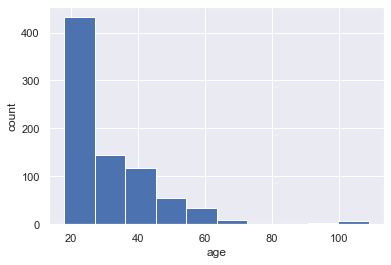

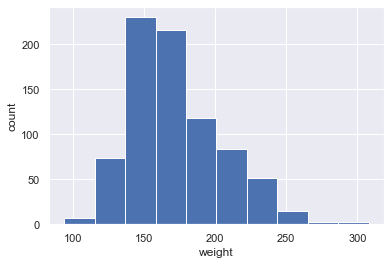

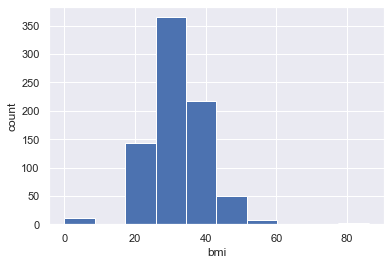

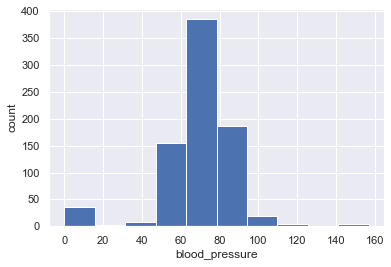

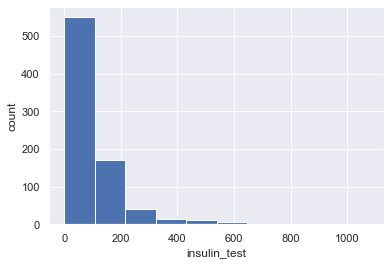

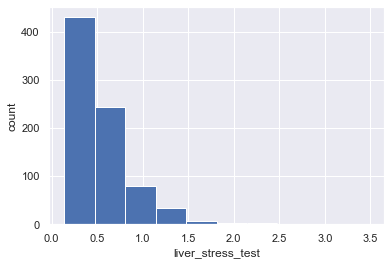

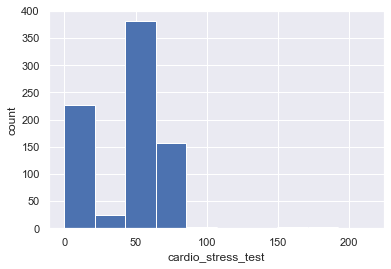

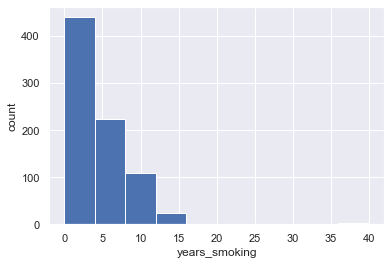

In [54]:
for i in df_train_X.columns:
    plt.figure()
    plt.xlabel(i)
    plt.ylabel('count')
    plt.hist(df_train[i])

<Figure size 432x288 with 0 Axes>

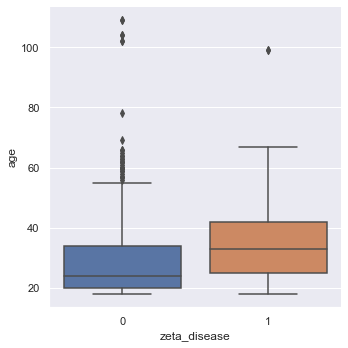

<Figure size 432x288 with 0 Axes>

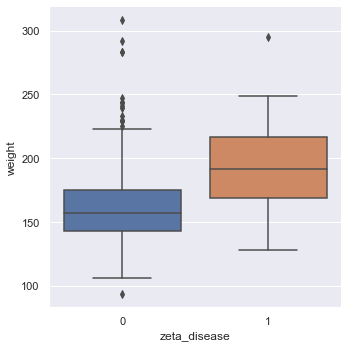

<Figure size 432x288 with 0 Axes>

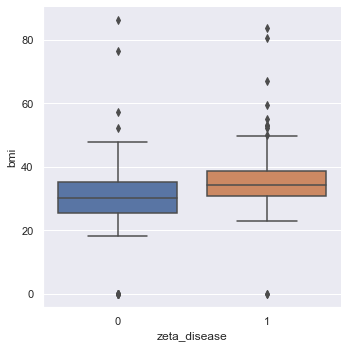

<Figure size 432x288 with 0 Axes>

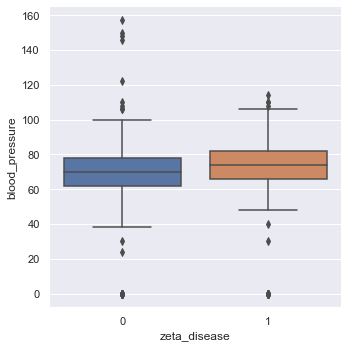

<Figure size 432x288 with 0 Axes>

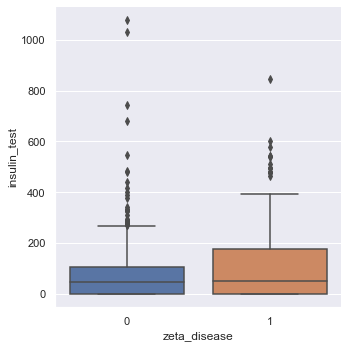

<Figure size 432x288 with 0 Axes>

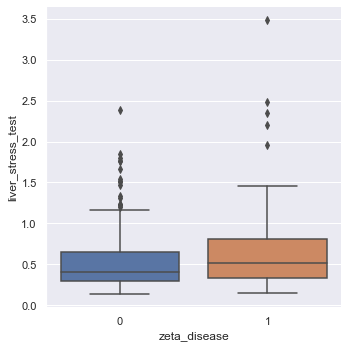

<Figure size 432x288 with 0 Axes>

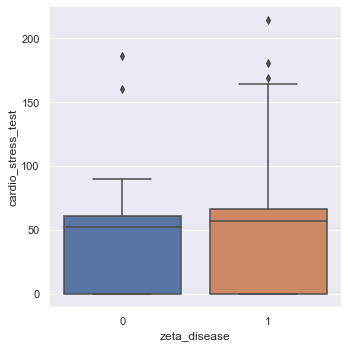

<Figure size 432x288 with 0 Axes>

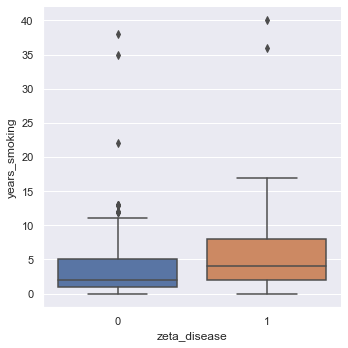

In [41]:
for i in df_train_X.columns:
    plt.figure()
    sns.catplot(x='zeta_disease',y=i,data=df_train,kind='box')
    

In [42]:
# lots of potential outliers with this dataset...

In [43]:
df_train[df_train['bmi']==0]
# well...this is a problem. BMI must have been calculated incorrectly for these patients, so I will remove them from the dataset because it is only 11/800 rows. 

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
27,66,186,0.0,82,0,0.7028,0,5,0
146,18,152,0.0,75,0,0.6348,53,0,0
227,21,155,0.0,0,0,0.3678,0,7,0
354,23,164,0.0,0,0,0.2518,0,6,0
447,22,144,0.0,0,0,0.3188,0,0,0
467,27,165,0.0,0,0,0.3238,0,10,1
509,18,134,0.0,0,0,0.3668,0,2,0
522,51,175,0.0,96,0,0.2948,0,8,1
687,18,168,0.0,64,89,1.7938,53,0,0
711,19,130,0.0,0,0,0.2368,0,3,0


In [63]:
df_train[df_train['blood_pressure']==0]
## similar problem with blood_pressure

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
25,28,141,29.8,0,0,0.5638,0,6,0
68,41,167,33.8,0,0,0.9948,0,0,0
74,25,196,27.5,0,0,0.3028,0,2,1
77,29,150,30.0,0,0,0.5468,0,7,1
80,26,165,35.3,0,0,0.1968,0,10,0
102,28,195,44.2,0,0,0.6928,0,0,1
106,21,169,32.4,0,0,0.2038,0,0,1
109,22,188,36.3,0,0,0.9958,0,0,1
110,28,140,28.0,0,0,0.6728,0,4,0
112,38,179,38.5,0,0,0.3668,0,2,0


In [64]:
# removing these records still leaves us with 95% of the original dataset, which I think is fine for this model. 
# perhaps we could fill in the zeros with the mean of those columns, but that feels intuitevely weird since it is health data
# some of the medical test columns contain a lot of zeros as well, but I would refer to a domain expert if that made sense for modeling purposes. My google searches did not provide any clarity for that. 
df_train_clean=df_train[(df_train['blood_pressure']>0) & (df_train['bmi']>0)]

In [65]:
len(df_train_clean)/len(df_train)

0.95125

In [69]:
#for the most part, we are seeing higher correlations in the cleaner dataset, meaning this will help with the accuracy of the model
df_train_clean.corr()['zeta_disease']-df_train.corr()['zeta_disease']

age                   0.007319
weight               -0.006246
bmi                   0.003116
blood_pressure        0.079243
insulin_test          0.012418
liver_stress_test     0.012405
cardio_stress_test    0.018665
years_smoking         0.003831
zeta_disease          0.000000
Name: zeta_disease, dtype: float64

# Creating logistic regression

In [70]:
# Since the scale of these columns is vastly different, I am going to standardize the data.

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [73]:
X=df_train_clean.drop(columns='zeta_disease')
y=df_train_clean['zeta_disease']

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_stan=scaler.transform(X)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_stan, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy: "+str(lr.score(X_test, y_test)))

Accuracy: 0.8496732026143791


In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[93  8]
 [15 37]]


In [93]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       101
           1       0.82      0.71      0.76        52

    accuracy                           0.85       153
   macro avg       0.84      0.82      0.83       153
weighted avg       0.85      0.85      0.85       153



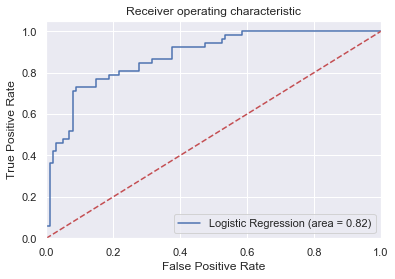

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [95]:
# All these metrics look good for this particular model. Some hyperparameter tuning could help things improve. 
# I think a thing to note is there are only 15 false negatives, so for predicting whether or not a patient has a certain disease, this is a good start. 
# Perhaps other modeling techniques could improve the accuracy (XG Boosting?) 
# More data would always be more helpful for increasing accuracy

In [97]:
df_pred_X=df_pred.drop(columns='zeta_disease')
scaler.fit(df_pred_X)
X_stan_pred=scaler.transform(df_pred_X)

In [105]:
df_pred['zeta_disease']=lr.predict(X_stan_pred)

In [106]:
df_pred

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,0
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0
